# Import Libaries

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\Absar\Desktop\cellphone_fiverr.xlsx")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Partition
0,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3,t
1,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3,t
2,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6,t
3,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9,t
4,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2,t


In [3]:
Partition_dummy = pd.get_dummies(df['Partition'])

In [4]:
df = pd.concat((df,Partition_dummy), axis=1)

In [5]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Partition,s,t,v
0,0,164,1,1,3.86,1,219.1,88,89.6,7.58,14.3,t,0,1,0
1,1,177,0,0,0.00,1,248.7,118,57.0,8.62,11.3,t,0,1,0
2,0,132,1,0,0.31,1,191.9,107,54.1,10.35,12.6,t,0,1,0
3,1,70,1,0,0.00,0,232.8,95,66.0,15.17,12.9,t,0,1,0
4,0,81,1,1,3.29,1,161.6,117,70.9,6.15,12.2,t,0,1,0


In [6]:
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Partition,s,t,v
2146,0,201,1,0,0.24,1,212.7,72,58.4,11.26,7.0,s,1,0,0
2147,1,108,0,0,0.38,2,115.1,114,41.8,10.57,13.8,s,1,0,0
2148,0,70,1,0,0.31,0,177.4,125,53.1,11.31,10.9,s,1,0,0
2149,0,62,1,0,0.00,4,245.3,91,53.0,6.15,8.5,s,1,0,0
2150,0,81,1,0,0.00,1,154.5,84,45.0,10.81,13.7,s,1,0,0


In [7]:
df= df.drop(['Partition'], axis=1)

In [8]:
X = df.values
y = df['Churn'].values

In [9]:
X= np.delete(X,1, axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10, p=2, metric='euclidean', weights='distance')
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.8074245939675174

In [12]:
y_pred = knn_clf.predict(X_test)

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Prediction Probabilities

In [14]:
r_probs= [0  for _ in range(len(y_test))]
knn_probs= knn_clf.predict_proba(X_test)

# K Fold Validation

In [15]:
score = cross_val_score(knn_clf, X,y, cv=10)

In [16]:
score

array([0.81944444, 0.84186047, 0.82790698, 0.82325581, 0.82325581,
       0.86511628, 0.80930233, 0.82790698, 0.80930233, 0.85581395])

In [17]:
knn_probs = knn_probs[:,1]

In [18]:
score = cross_val_score(knn_clf, X,y, cv=10,error_score=10)

In [19]:
score

array([0.81944444, 0.84186047, 0.82790698, 0.82325581, 0.82325581,
       0.86511628, 0.80930233, 0.82790698, 0.80930233, 0.85581395])

In [20]:
knn_clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
k_range= range(1,10)
k_score = []

for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_clf, X,y, cv=10)
    k_score.append(score.mean())

In [22]:
k_score

[0.7801076658053403,
 0.8247394487510767,
 0.821485788113695,
 0.8265977605512489,
 0.8252002583979328,
 0.8293798449612403,
 0.8317097329888028,
 0.8298471145564168,
 0.8289168819982773]

# Calculate Error

In [26]:
from sklearn.metrics import mean_squared_error

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.1925754060324826


In [52]:
# The mean error show the overall error of data set

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
random_probs= [0 for _ in range(len(y_test))]
fpr, tpr, thersh = roc_curve(y_test,knn_probs,pos_label=1)
knn_clf_fpr, knn_clf_tpr,_ = roc_curve(y_test,knn_probs)
f_fpr, f_fpr,_ = roc_curve(y_test,random_probs,pos_label=1)

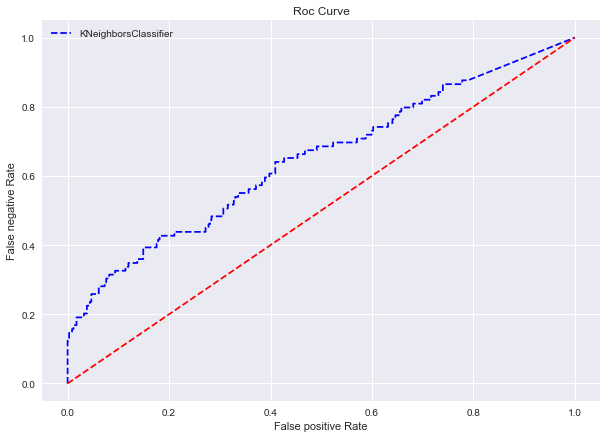

In [48]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
plt.plot(knn_clf_fpr, knn_clf_tpr, linestyle='--', color='blue', label='KNeighborsClassifier')
plt.plot(f_fpr, f_fpr, linestyle='--', color='red')
plt.title('Roc Curve')
plt.xlabel('False positive Rate')
plt.ylabel('False negative Rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# Explanation

In [51]:
# When we decrease the threshold, we get more positive values thus it increases the sensitivity and decreasing the specificity.
# Similarly, when we increase the threshold, we get more negative values thus we get higher specificity and lower sensitivity.
# As we know FPR  1 - specificity. So when we increase TPR, FPR also increases and vice versa.